# LangChain Expression Language (LCEL)
- LCEL은 LangChain에서 **체인(Chain)** 을 선언적으로 구성하기 위한 언어입니다.

## 주요 특징
- 선언적 구성: 작업의 순서와 흐름을 명시적으로 정의하여, 복잡한 로직을 간결하게 표현할 수 있습니다.
- 파이프 연산자(|) 지원: Unix의 파이프처럼, 함수의 출력을 다음 함수의 입력으로 전달하여 체인을 구성합니다.

# Chain: Prompt | Model | OutputParser


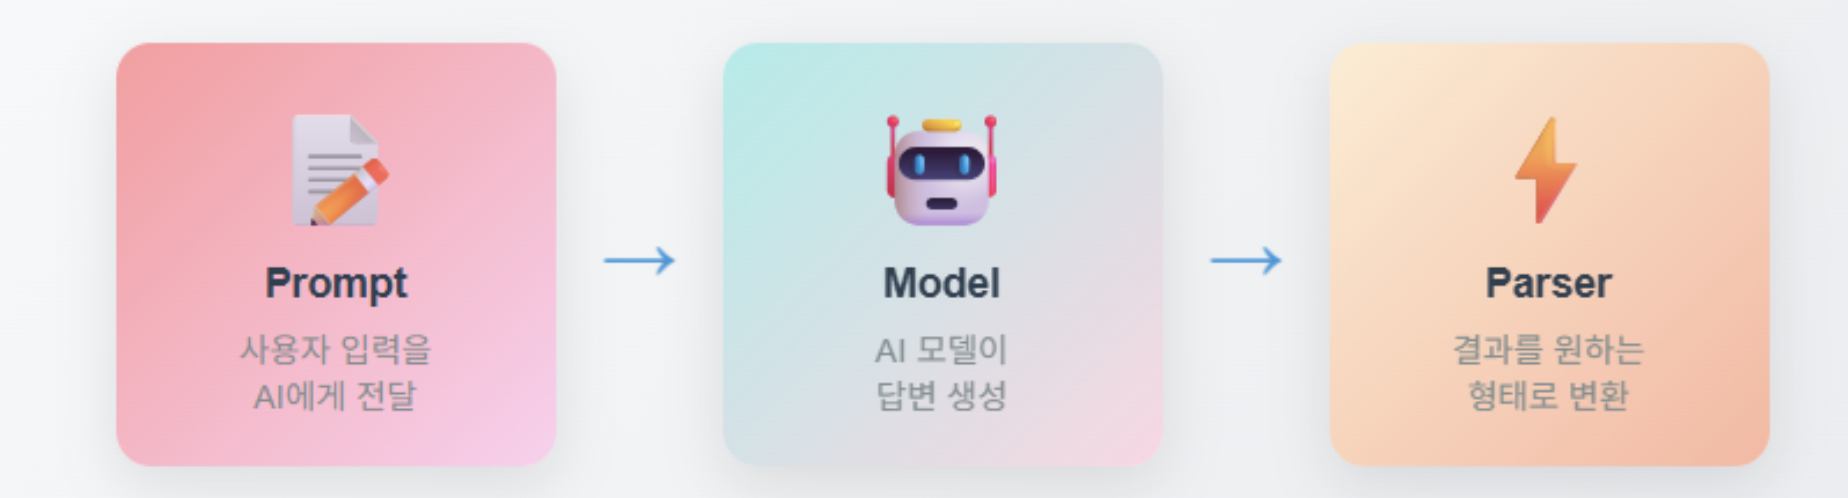

# Prompt

In [1]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.messages import SystemMessage
from langchain_core.prompts import HumanMessagePromptTemplate

In [2]:
chat_prompt = ChatPromptTemplate.from_messages([
    SystemMessage(content="당신은 친근하고 도움이 되는 AI 어시스턴트입니다."),
    HumanMessagePromptTemplate.from_template("{question}")
])

# Model

## [OpenAI API Key 발급](https://platform.openai.com/api-keys)

In [3]:
from dotenv import load_dotenv

# 환경변수 로드
load_dotenv()

True

In [4]:
import os 

# API 키 확인
api_key = os.getenv("OPENAI_API_KEY")
if api_key:
    print("OpenAI API 키가 설정되었습니다. (GPT 모델 사용)")
else:
    print("OpenAI API 키가 없습니다.")

OpenAI API 키가 설정되었습니다. (GPT 모델 사용)


## ChatOpenAI

In [6]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(
    model="gpt-5-nano",
    reasoning_effort="high",        # 논리성 강화
)

# Parser

In [7]:
from langchain_core.output_parsers import StrOutputParser

# OutputParser 설정
output_parser = StrOutputParser()

# Chain

In [8]:
# 체인 생성: Prompt | Model | OutputParser
full_chain = chat_prompt | model | output_parser

In [9]:
# 체인 실행 (결과가 문자열로 바로 반환됨)
result = full_chain.invoke({"question": "파이썬의 장점 3가지를 알려주세요."})


In [10]:
print(result)

다음의 3가지를 꼽을 수 있습니다.

1) 가독성과 생산성
- 간결한 문법과 들여쓰기 기반 구조로 코드가 읽기 쉽고, 빠르게 개발을 시작할 수 있습니다.

2) 방대한 라이브러리와 생태계
- 표준 라이브러리와 PyPI에 수많은 패키지가 있어 웹 개발, 데이터 과학, 자동화 등 다양한 분야의 도구를 바로 활용 가능.

3) 플랫폼 독립성과 빠른 프로토타이핑
- Windows/macOS/Linux 등에서 거의 동일하게 작동하고, 인터프리터 언어여서 아이디어를 바로 테스트하고 프로토타입을 빠르게 만들 수 있습니다.
